In [1]:
## Librerias
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/agust/Desktop/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


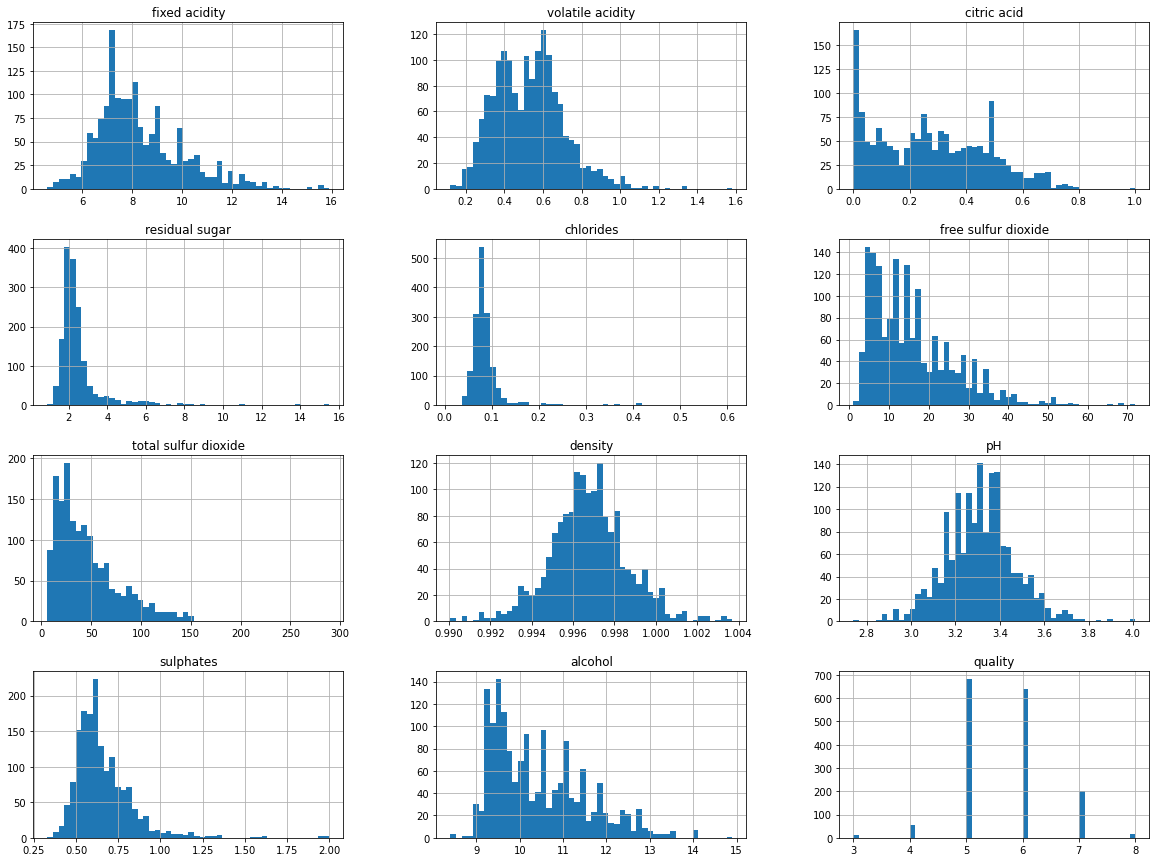

In [4]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

El dataset esta desbalanceado

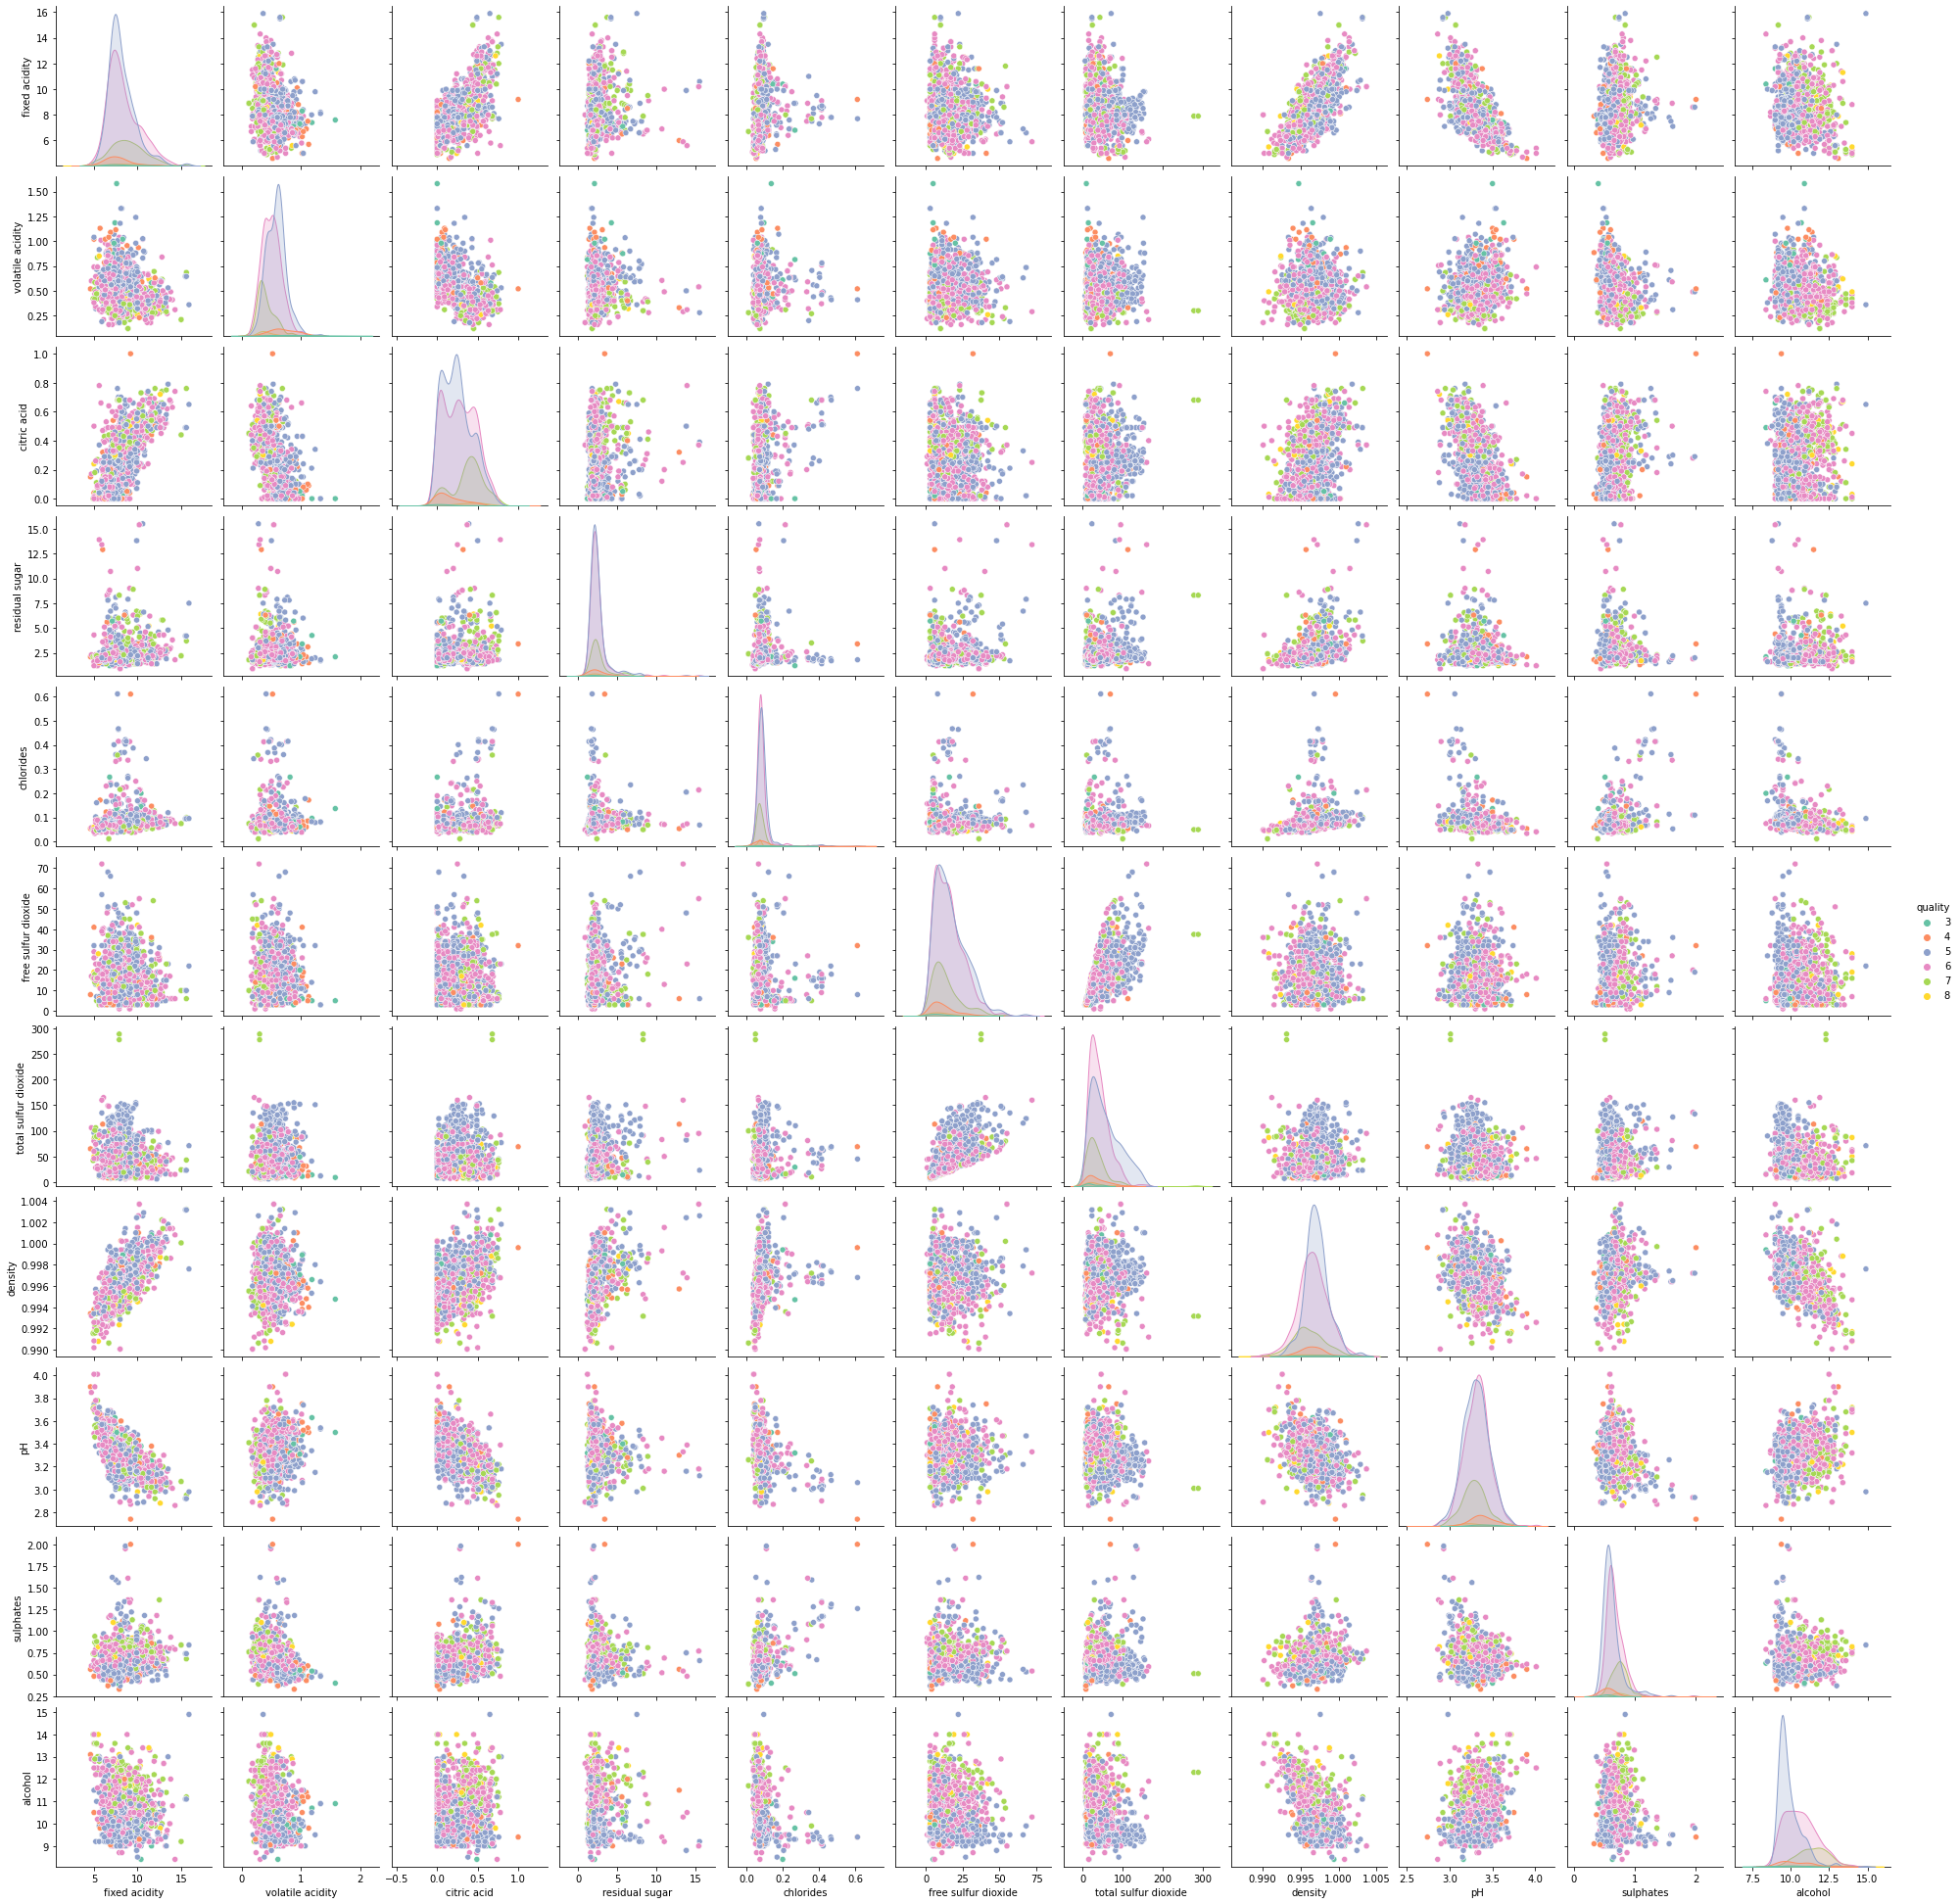

In [5]:
sns.pairplot(df, hue="quality", palette = "Set2" )

<AxesSubplot:>

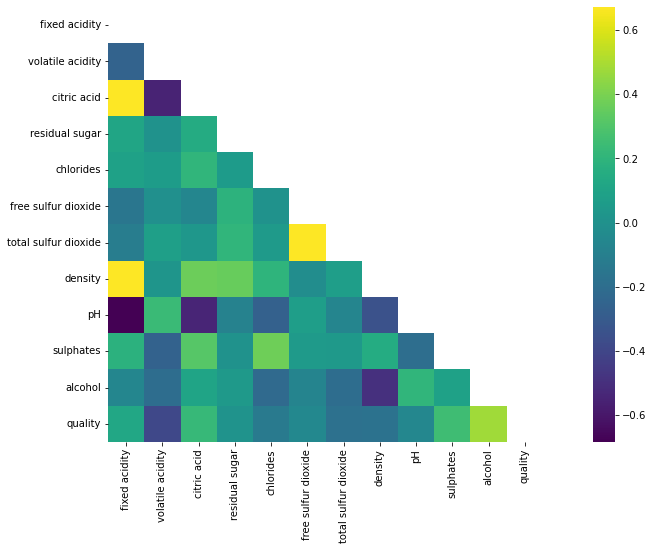

In [6]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), cmap='viridis', mask=mask, annot=False, square=True)

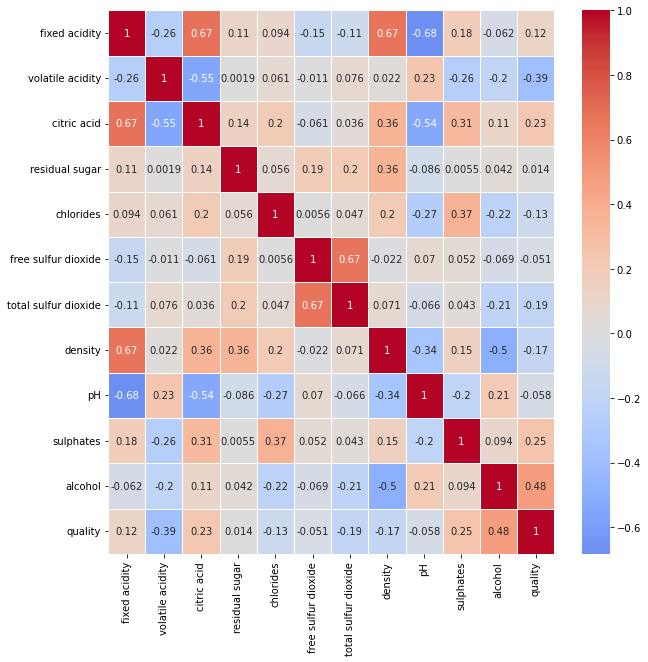

In [7]:
# Otra forma heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

In [8]:
# Confirming missing values
#df.isnull().all()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.shape

(1599, 12)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.quality.value_counts() # solo representacion de 6 categorias

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df_X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

df_y = df[['quality']]

In [13]:
df_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
# normalizo el dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)
#x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [15]:
df_X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [16]:
# Separo en X e y
#X_train, X_val, X_test = df_X.loc[[0,900]], df_X.loc[[900,1000]], df_X.loc[[1000,1598]]
#y_train, y_val, y_test = df_y.loc[[0,900]], df_y.loc[[900,1000]], df_y.loc[[1000,1598]]
# Al final no uso esto porque esta desbalanceado

In [26]:
# Como tengo muchas categorias necisto codificarlo 

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df_y = le.fit_transform(df_y)


In [27]:
# Separo en train y test
# NOTAR QUE ESTRATIFICO PORQUE ESTA DESBALANCEADO!!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, stratify = df_y)

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 6)

y_test = to_categorical(y_test, 6)

In [28]:
X_train.shape

(1071, 11)

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape = 11,)) 
model.add(keras.layers.Dense(300, activation = 'relu'))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               3600      
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 6)                 606       
                                                                 
Total params: 34,306
Trainable params: 34,306
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Una vez creado el modelo hay que compilarlo especificando la funcion de costo y el optimizador

model.compile(loss = 'categorical_crossentropy', #porque tengo salidas deterministicas
              optimizer = 'sgd', #stochastic gradient descent, automaticamente se setea en 0.01
              metrics = ['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs = 60)

Epoch 1/60
34/34 [==============================] - 1s 7ms/step - loss: 1.7006 - accuracy: 0.3371
Epoch 2/60
34/34 [==============================] - 0s 6ms/step - loss: 1.4427 - accuracy: 0.4267
Epoch 3/60
34/34 [==============================] - 0s 6ms/step - loss: 1.2982 - accuracy: 0.5275
Epoch 4/60
34/34 [==============================] - 0s 6ms/step - loss: 1.2099 - accuracy: 0.5761
Epoch 5/60
34/34 [==============================] - 0s 6ms/step - loss: 1.1510 - accuracy: 0.5705
Epoch 6/60
34/34 [==============================] - 0s 6ms/step - loss: 1.1080 - accuracy: 0.5752
Epoch 7/60
34/34 [==============================] - 0s 6ms/step - loss: 1.0754 - accuracy: 0.5873
Epoch 8/60
34/34 [==============================] - 0s 6ms/step - loss: 1.0499 - accuracy: 0.5938
Epoch 9/60
34/34 [==============================] - 0s 5ms/step - loss: 1.0305 - accuracy: 0.5957
Epoch 10/60
34/34 [==============================] - 0s 5ms/step - loss: 1.0159 - accuracy: 0.5948
Epoch 11/60
34/34 [

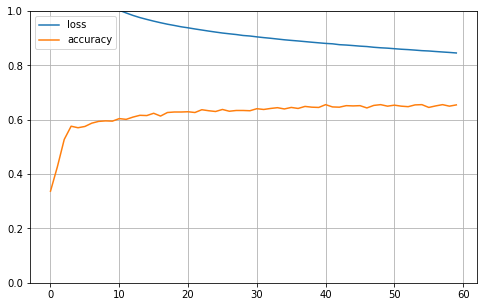

In [33]:
# Grafico el accuracy
df = pd.DataFrame(history.history)
df.plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0,1]
plt.show()

In [34]:
# Finalmente evaluamos el modelo con el set de evaluacion

model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 6ms/step - loss: 0.9453 - accuracy: 0.5890


[0.9453027248382568, 0.5890151262283325]